# Support Vector Machines (SMVs)

One of the most popular ML models that can be used for linear or non-linear classification, regression, and outlier detection. SMVs are particularly for classification on complex small- or medium-sized datasets.

### Table of Content
#### 1. Linear SVM Classification
1.1 Example 1: Support Vectors

1.2 Example 2: Hyperparameter C

1.3 Example 3: With Train-Test-Split
#### 2. Non-Linear SVM Classification
2.1 Polynomial Kernel

2.2 Gaussian RBF Kernel
#### 3. SVM Classification versus Logistic Regression

#### 4. SVM Regression


# 1. Linear SVM Classification

The basic idea is to find a decision boundary that not only separates the classes but stays as far away from the closest training instances as possible. Thus, a SVM tries to build the widest street possible between the classes (**large margin classification**).

**Soft Margin Classification**
Since it is not always possible to find a decision boundary that perfectly separates the classes and has a wide margin (for example when there are outliers), we can build a more flexible model that allows for instances to end up "in the middle of the road" or on the other side (which is a **margin violation**) but still tries to keep the road as wide as possible.

The **hyperparameter C** is used to control how wide the street will be and thus influences the amount of margin error. Again, we have a trade-off: a model with only a few margin violations might generalize worse than one with a wider street and more violations.

In [376]:
# load data
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

print(iris.target_names)

['setosa' 'versicolor' 'virginica']


### Example 1: Support Vectors

In [377]:
# split data in features and target
# feature: petal width and petal length
# target: Setosa or oher

import numpy as np
X = iris["data"][:,2:] # petal length and width
y = (iris["target"]==0) # select one type of flower for binary prediction
y = y.astype(np.int) # 0 negative, 1 positive class

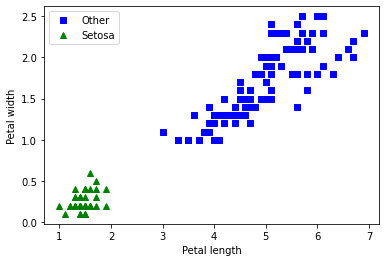

In [378]:
# plot data
import matplotlib.pyplot as plt
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Other")
plt.plot(X[y==1, 0], X[y==1, 1], "g^", label="Setosa")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()

In [379]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Model with C=10
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=10, loss="hinge")),
])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=10, loss='hinge'))])

In [380]:
def plot_SVC_support_vector_and_decision_function(svm_clf, C):
    # obtain the support vectors through the decision function
    decision_function = svm_clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]
    
    plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Negative class")
    plt.plot(X[y==1, 0], X[y==1, 1], "g^", label="Positive class")
    
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = svm_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k', alpha=0.5)
        
    plt.xlabel("Petal length")
    plt.ylabel("Petal width")
    plt.legend()

    plt.title("C=" + str(C))

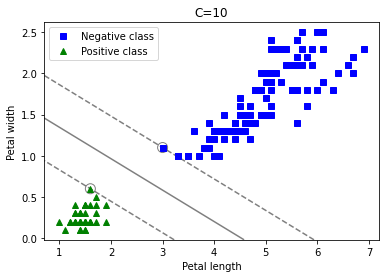

In [381]:
# Plot decision boundaries and support vectors
plot_SVC_support_vector_and_decision_function(svm_clf, 10)

**Support Vectors** (here in black circles) are data points on the street that separates the classes. There might be many ways to draw a decision boundary between two classes but SVM tries to draw a decision boundary so that the distance to the closest data points for each class is optimal depending on the setup. These close points are called support vectors, since they support the resulting decision boundary.

Only these points determine the decision boundary. You could remove all the other points or add more instances without any effect as long as they are not located on the street (in which case they could become support vectors and the street could change).

### Example 2: Hyperparameter C

In [382]:
# split data in features and target
# feature: petal width and petal length
# target: Virginica or ohter

import numpy as np
X = iris["data"][:,2:] # petal length and width
y = (iris["target"]==2) # select one type of flower for binary prediction
y = y.astype(np.int) # 0 negative, 1 positive class

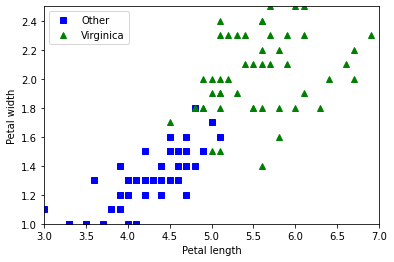

In [383]:
# plot data
import matplotlib.pyplot as plt
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Other")
plt.plot(X[y==1, 0], X[y==1, 1], "g^", label="Virginica")
plt.xlim(3,7)
plt.ylim(1,2.5)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()

In [384]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Model with C=small
svm_clf_1 = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])
svm_clf_1.fit(X, y)

# Model with C=large
svm_clf_2 = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=95, loss="hinge")),
])
svm_clf_2.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=95, loss='hinge'))])

The **hyperparameter C** controls the margin size. A small C results in a wide street and a small C in a more narrow street. When it comes to generalization and the choice of C, the discussion is similar to the Bias-Variance Trade-off since large C work better on training data (fewer margin violations) but might result in overfitting.

(1.0, 2.5)

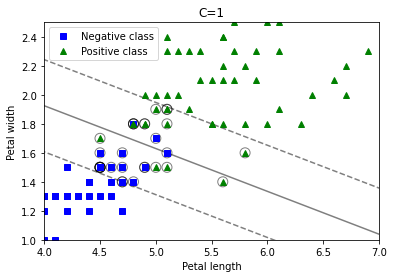

In [385]:
# Plot decision boundaries and support vectors
# C = Small
# 4 margin violations for the positive class
# 3 margin violations for the negative class
plot_SVC_support_vector_and_decision_function(svm_clf_1, 1)
plt.xlim(4,7)
plt.ylim(1,2.5)

(1.0, 2.5)

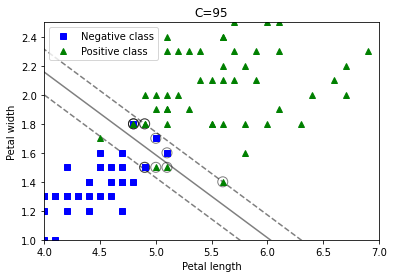

In [386]:
# Plot decision boundaries and support vectors
# C = Large
# 3 margin violations for the positive class
# 3 margin violations for the negative class
plot_SVC_support_vector_and_decision_function(svm_clf_2, 95)
plt.xlim(4,7)
plt.ylim(1,2.5)

In [387]:
# Classification performance: Large margin (small C)

from sklearn.metrics import classification_report
print(classification_report(y, svm_clf_1.predict(X), target_names=["Negative Class", "Positive Class"]))

                precision    recall  f1-score   support

Negative Class       0.96      0.97      0.97       100
Positive Class       0.94      0.92      0.93        50

      accuracy                           0.95       150
     macro avg       0.95      0.95      0.95       150
  weighted avg       0.95      0.95      0.95       150



In [388]:
# Classification performance: Small margin (large C)

from sklearn.metrics import classification_report
print(classification_report(y, svm_clf_2.predict(X), target_names=["Negative Class", "Positive Class"]))

                precision    recall  f1-score   support

Negative Class       0.97      0.97      0.97       100
Positive Class       0.94      0.94      0.94        50

      accuracy                           0.96       150
     macro avg       0.95      0.95      0.95       150
  weighted avg       0.96      0.96      0.96       150



#### Interpretation:

When we take a look at the graphs and classification report, we find that the large margin model has a slightly higher precision for the negative class than the small margin model. The reason is that the small margin model has fewer margin violations (false negatives) than the large margin model. However, it has more false positives and thus the precision for the positive class is lower than for the large margin model.

**Note that this does not say which model is better for our data since we did no split in training and test data nor did we do any cross-validation.**

This is what we will do next to see, whether we should work with a large or small margin model for this data set.

### Example 3: With Train-Test-Split

In [389]:
# split data in features and target
# feature: petal width and petal length
# target: Virginica or ohter

import numpy as np
X = iris["data"][:,2:] # petal length and width
y = (iris["target"]==2) # select one type of flower for binary prediction
y = y.astype(np.int) # 0 negative, 1 positive class

# shuffle data
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=42)

# Train-test split
X_train = X[:100]
X_test = X[100:]

y_train = y[:100]
y_test = y[100:]

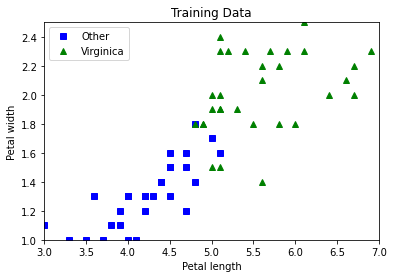

In [390]:
# plot training data
import matplotlib.pyplot as plt
plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], "bs", label="Other")
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], "g^", label="Virginica")
plt.xlim(3,7)
plt.ylim(1,2.5)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("Training Data")
plt.legend()

In [22]:
def plot_SVC_support_vector_and_decision_function_train_test(svm_clf, C, X, y):
    # obtain the support vectors through the decision function
    decision_function = svm_clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]
    
    plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Negative class")
    plt.plot(X[y==1, 0], X[y==1, 1], "g^", label="Positive class")
    
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = svm_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k', alpha=0.5)
        
    plt.xlabel("Petal length")
    plt.ylabel("Petal width")
    plt.legend()

    plt.title("C=" + str(C))

In [392]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Model with C=small
svm_clf_1 = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])
svm_clf_1.fit(X_train, y_train)

# Model with C=large
svm_clf_2 = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=95, loss="hinge")),
])
svm_clf_2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=95, loss='hinge'))])

(1.0, 2.5)

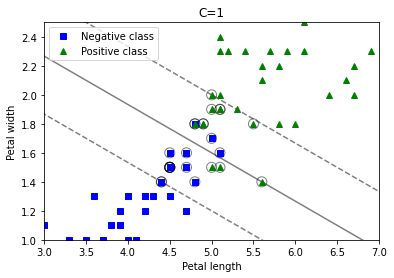

In [393]:
# Plot decision boundaries and support vectors
# C = Small
plot_SVC_support_vector_and_decision_function_train_test(svm_clf_1, 1, X_train, y_train)
plt.xlim(3,7)
plt.ylim(1,2.5)

(1.0, 2.5)

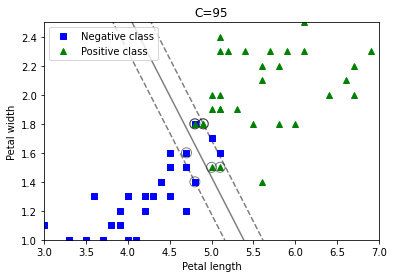

In [394]:
# Plot decision boundaries and support vectors
# C = Large
plot_SVC_support_vector_and_decision_function_train_test(svm_clf_2, 95, X_train, y_train)
plt.xlim(3,7)
plt.ylim(1,2.5)

#### Interpretation:
The smaller margin model has fewer margin violations for the positive class (no false negatives) on the training data, but both models perform equally well on the test data, as the classification performance report below shows.

In [395]:
# Classification performance: Large margin (small C)

from sklearn.metrics import classification_report
print(classification_report(y_test, svm_clf_1.predict(X_test), target_names=["Negative Class", "Positive Class"]))

                precision    recall  f1-score   support

Negative Class       0.97      1.00      0.98        31
Positive Class       1.00      0.95      0.97        19

      accuracy                           0.98        50
     macro avg       0.98      0.97      0.98        50
  weighted avg       0.98      0.98      0.98        50



In [396]:
# Classification performance: Small margin (large C)

from sklearn.metrics import classification_report
print(classification_report(y_test, svm_clf_2.predict(X_test), target_names=["Negative Class", "Positive Class"]))

                precision    recall  f1-score   support

Negative Class       0.97      1.00      0.98        31
Positive Class       1.00      0.95      0.97        19

      accuracy                           0.98        50
     macro avg       0.98      0.97      0.98        50
  weighted avg       0.98      0.98      0.98        50



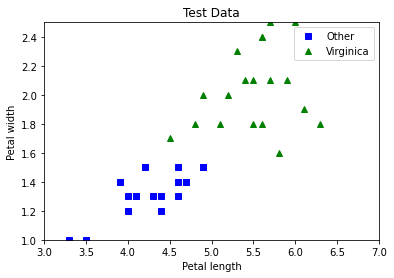

In [397]:
# plot training data
import matplotlib.pyplot as plt
plt.plot(X_test[y_test==0, 0], X_test[y_test==0, 1], "bs", label="Other")
plt.plot(X_test[y_test==1, 0], X_test[y_test==1, 1], "g^", label="Virginica")
plt.xlim(3,7)
plt.ylim(1,2.5)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("Test Data")
plt.legend()

(1.0, 2.5)

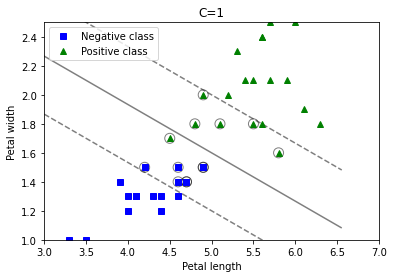

In [398]:
# Plot decision boundaries and support vectors for test data
# C = Small
plot_SVC_support_vector_and_decision_function_train_test(svm_clf_1, 1, X_test, y_test)
plt.xlim(3,7)
plt.ylim(1,2.5)

(1.0, 2.5)

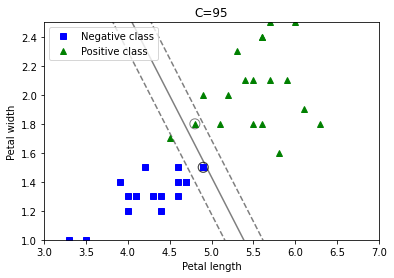

In [399]:
# Plot decision boundaries and support vectors for test data
# C = large
plot_SVC_support_vector_and_decision_function_train_test(svm_clf_2, 95, X_test, y_test)
plt.xlim(3,7)
plt.ylim(1,2.5)

#### Interpretation: 
Plotting the test data and the the decision boundaries for both models show that they perform equally well. However, we see that the small margin model almost wrongly classifies the one negative data point close to the decision boundary. That would have been the result of overfitting on training data with a too large hyperparmater C. Thus, its better to have a slightly wider margin model.

# 2. Non-Linear SVM Classification

Adding polynomial features can help to deal with more complex datasets. However, at a higher degree the number of features can explode. SVM allow to use a mathematically method instead of actually adding more features, called **kernel trick**.

Often used in a non-linear classification problem are **Polynomial Kernel** and **Gaussian RBF (Similarity Feature)**

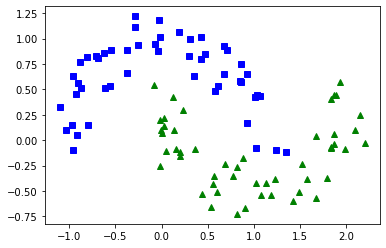

In [400]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15)

plt.plot(X[y==0, 0], X[y==0,1], "bs")
plt.plot(X[y==1, 0], X[y==1,1], "g^")

In [401]:
# adapted from https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

### Example 1: Using Polynomial Kernel

In [402]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Model with third-degree polynomial kernel and C=5 (wide margin)
svm_clf_1 = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", SVC(kernel="poly", degree=3, coef0=1, C=5)),
])

svm_clf_1.fit(X, y)

# Model with tenth-degree polynomial kernel and C=20 (close margin) and higher influence of high-degree features
svm_clf_2 = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", SVC(kernel="poly", degree=10, coef0=30, C=20)),
])

svm_clf_2.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', SVC(C=20, coef0=30, degree=10, kernel='poly'))])

Text(0, 0.5, '')

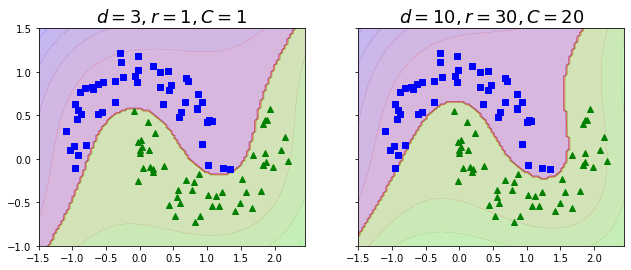

In [403]:
# Plot models over data
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(svm_clf_1, [-1.5, 2.45, -1, 1.5])
plt.plot(X[y==0, 0], X[y==0,1], "bs")
plt.plot(X[y==1, 0], X[y==1,1], "g^")
plt.title(r"$d=3, r=1, C=1$", fontsize=18)

plt.sca(axes[1])
plot_predictions(svm_clf_2, [-1.5, 2.45, -1, 1.5])
plt.plot(X[y==0, 0], X[y==0,1], "bs")
plt.plot(X[y==1, 0], X[y==1,1], "g^")
plt.title(r"$d=10, r=30, C=20$", fontsize=18)
plt.ylabel("")


### Example 2: Using Gaussian Radial Basis Function (RBF) Kernel for Similarity

In [404]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Model with 
svm_clf_1 = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", SVC(kernel="rbf", gamma=0.1, C=0.8)),
])
svm_clf_1.fit(X, y)

# Model with 
svm_clf_2 = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", SVC(kernel="rbf", gamma=10, C=0.8)),
])
svm_clf_2.fit(X, y)

# Model with 
svm_clf_3 = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", SVC(kernel="rbf", gamma=0.1, C=1000)),
])
svm_clf_3.fit(X, y)

# Model with 
svm_clf_4 = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", SVC(kernel="rbf", gamma=10, C=1000)),
])
svm_clf_4.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', SVC(C=1000, gamma=10))])

Text(0, 0.5, '')

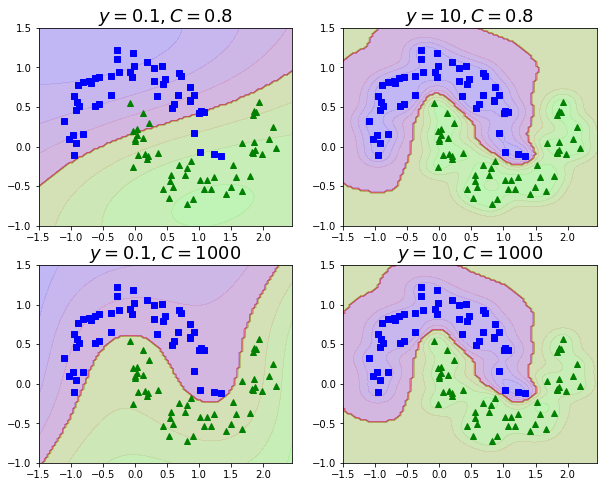

In [405]:
# Plot models over data: Different Gamma, Small C
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
ax = axes.reshape(-1)

plt.sca(ax[0])
plot_predictions(svm_clf_1, [-1.5, 2.45, -1, 1.5])
plt.plot(X[y==0, 0], X[y==0,1], "bs")
plt.plot(X[y==1, 0], X[y==1,1], "g^")
plt.title(r"$y=0.1, C=0.8$", fontsize=18)

plt.sca(ax[1])
plot_predictions(svm_clf_2, [-1.5, 2.45, -1, 1.5])
plt.plot(X[y==0, 0], X[y==0,1], "bs")
plt.plot(X[y==1, 0], X[y==1,1], "g^")
plt.title(r"$y=10, C=0.8$", fontsize=18)
plt.ylabel("")

# Plot models over data: Different Gamma, Large C
plt.sca(ax[2])
plot_predictions(svm_clf_3, [-1.5, 2.45, -1, 1.5])
plt.plot(X[y==0, 0], X[y==0,1], "bs")
plt.plot(X[y==1, 0], X[y==1,1], "g^")
plt.title(r"$y=0.1, C=1000$", fontsize=18)

plt.sca(ax[3])
plot_predictions(svm_clf_4, [-1.5, 2.45, -1, 1.5])
plt.plot(X[y==0, 0], X[y==0,1], "bs")
plt.plot(X[y==1, 0], X[y==1,1], "g^")
plt.title(r"$y=10, C=1000$", fontsize=18)
plt.ylabel("")

#### Interpretation:
As we already know from the linear case, the **hyperparameter C** corresponds to the margin of the street established by the support vectors. Thus, a very small C leads to a large margin, which in this non-linear case is a bad choice. The larger C, the more curvy the decision boundary becomes, and the more appropriate it is for the data at hand.

**Gamma** corresponds to the wideness of the decision boundary. If gamma is low, each instance has a large range of influence and the area surrounding the datapoints is quite large. With a small gamma, the area of influence becomes more narrow and the separation of class more precise. However, this might lead to overfitting the training data and a bad performance on test data. Thus, gamma can be used as a regularization parameter to prevent overfitting.

# 3. SVM Classification versus Logistic Regression

- a SVM classifier outputs the predicted class and not the corresponding probability like Logistic Regression
- SVM tries to find the best decision boundary as the one with the largest distance (margin) to the support vectors, ignoring the other points further away; Logistic Regression uses all data points and looks for the line with minimal overall error.
- SVM is less vulnerable to overfitting than Logistic Regression (why?)
- Logistic Regression is preferred for large number of features and small number of observations
- SVM with polynomial or Gaussian kernel is preferred for small number of features and moderate number of observations

# 4. SVM Regression

To use SVM for regression problems, we need to **reverse the objective**: instead of finding the widest street between the two classes with limited margin violations,we try to fit as many instances on the street while limiting the number of instances outside the street.

Instead of C in the classification case, the width of the street is controlled by the **hyperparameter epsilon**. SVM Regressions are called epsilon-insensitive, since adding more training instances within the margin does not affect the predictions.

In [427]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.5)
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, epsilon=0.5, kernel='poly')

# 5. Homework

## 5.1 LinearSVC vs SVC vs SGDClassifier

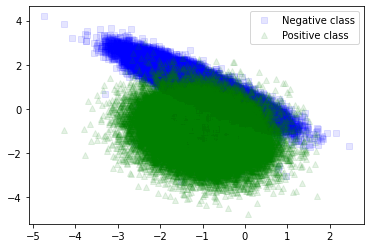

In [46]:
# Generate random data set
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import numpy as np

X, y = make_classification(n_samples=100000, n_features=2, n_redundant=0, n_informative=2, 
                           n_clusters_per_class=1, random_state=91)

plt.plot(X[y==0, 0], X[y==0,1], "bs", alpha=0.1, label="Negative class")
plt.plot(X[y==1, 0], X[y==1,1], "g^", alpha=0.1, label="Positive class")
plt.legend()

In [48]:
from sklearn.svm import LinearSVC

lin_svc = LinearSVC()

lin_svc.fit(X, y)

%time y_pred = lin_svc.predict(X)

# Model accuracy
from sklearn.metrics import classification_report
print(classification_report(y, y_pred, target_names=["Negative Class", "Positive Class"]))


CPU times: user 6 ms, sys: 243 µs, total: 6.24 ms
Wall time: 1.43 ms
                precision    recall  f1-score   support

Negative Class       0.92      0.98      0.95     49964
Positive Class       0.98      0.92      0.95     50036

      accuracy                           0.95    100000
     macro avg       0.95      0.95      0.95    100000
  weighted avg       0.95      0.95      0.95    100000



In [50]:
from sklearn.svm import SVC

svc_lin = SVC(kernel="linear")

svc_lin.fit(X, y)

%time y_pred = svc_lin.predict(X)

# Model accuracy
from sklearn.metrics import classification_report
print(classification_report(y, y_pred, target_names=["Negative Class", "Positive Class"]))



CPU times: user 8.09 s, sys: 45.6 ms, total: 8.14 s
Wall time: 8.16 s
                precision    recall  f1-score   support

Negative Class       0.92      0.98      0.95     49964
Positive Class       0.98      0.92      0.95     50036

      accuracy                           0.95    100000
     macro avg       0.95      0.95      0.95    100000
  weighted avg       0.95      0.95      0.95    100000



In [52]:
# sklearn documentation:
# The model it fits can be controlled with the loss parameter; 
# by default, it fits a linear support vector machine (SVM).
# Defaults to ‘hinge’, which gives a linear SVM.

from sklearn.linear_model import SGDClassifier

sgd_class = SGDClassifier()

sgd_class.fit(X, y)

%time y_pred = sgd_class.predict(X)

# Model accuracy
from sklearn.metrics import classification_report
print(classification_report(y, y_pred, target_names=["Negative Class", "Positive Class"]))




CPU times: user 3.64 ms, sys: 53 µs, total: 3.69 ms
Wall time: 885 µs
                precision    recall  f1-score   support

Negative Class       0.93      0.97      0.95     49964
Positive Class       0.97      0.93      0.95     50036

      accuracy                           0.95    100000
     macro avg       0.95      0.95      0.95    100000
  weighted avg       0.95      0.95      0.95    100000



### Performance Summary

As expected, the optimized linear implementation of SVC significantly outperformed linear-kernalized SVC. However, to my surprise LinearSVC was outperformed by SGDClassifier with hinge loss.

| Model | LinearSVC | SVC(kernel=linear) | SGDClassifier(loss=hinge) |   |
|-------|-----------|--------------------|---------------------------|---|
| Time  | 6.24 ms   | 8.14 s             | 3.69 ms                   |   |


## 5.2 SVM Classifier on MNIST data set

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

X, y = mnist["data"], mnist["target"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

### LinearSVC

In [9]:
# Train LinearSVC (uses ovr from the get-go)

from sklearn.svm import LinearSVC

lin_svc = LinearSVC()

#%time lin_svc.fit(X_train[:10000,], y_train[:10000,]) # using sampling to train, 8s
%time lin_svc.fit(X_train, y_train) # 

CPU times: user 2min 1s, sys: 144 ms, total: 2min 1s
Wall time: 2min 1s


/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [10]:
y_pred = lin_svc.predict(X_test)

In [11]:
# accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

# classification report (precision recall support)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

0.8334285714285714
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1387
           1       0.93      0.98      0.95      1580
           2       0.82      0.86      0.84      1443
           3       0.79      0.86      0.82      1435
           4       0.89      0.86      0.87      1350
           5       0.83      0.74      0.78      1231
           6       0.97      0.82      0.89      1387
           7       0.63      0.97      0.76      1458
           8       0.86      0.71      0.77      1368
           9       0.89      0.53      0.67      1361

    accuracy                           0.83     14000
   macro avg       0.85      0.83      0.83     14000
weighted avg       0.85      0.83      0.83     14000



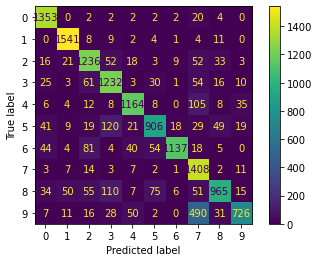

In [12]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lin_svc, X_test, y_test)  

### SVC with linear kernel

In [4]:
# Train SVM classifier for multiclass problem (OvR)

from sklearn.svm import SVC

svc = SVC(kernel="linear", decision_function_shape="ovr", verbose=True)

%time svc.fit(X_train[:10000,], y_train[:10000,]) # using sampling to train

[LibSVM]CPU times: user 15.9 s, sys: 55.2 ms, total: 16 s
Wall time: 16 s


SVC(kernel='linear', verbose=True)

In [5]:
y_pred = svc.predict(X_test)

In [8]:
# accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

# classification report (precision recall support)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

0.9072857142857143
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1387
           1       0.94      0.99      0.97      1580
           2       0.89      0.91      0.90      1443
           3       0.87      0.86      0.87      1435
           4       0.88      0.94      0.91      1350
           5       0.86      0.86      0.86      1231
           6       0.96      0.93      0.94      1387
           7       0.92      0.92      0.92      1458
           8       0.89      0.84      0.86      1368
           9       0.91      0.85      0.88      1361

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000



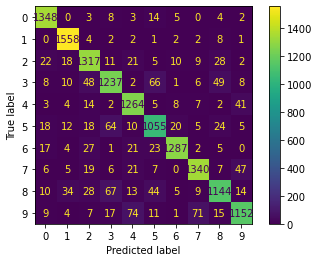

In [9]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc, X_test, y_test)  

### SVC with RBF kernel

In [2]:
# Train SVM classifier for multiclass problem (OvR)

from sklearn.svm import SVC

rbf_svc = SVC(kernel="rbf", decision_function_shape="ovr")

%time rbf_svc.fit(X_train[:10000,], y_train[:10000,]) # using sampling to train

[LibSVM]CPU times: user 29.1 s, sys: 166 ms, total: 29.2 s
Wall time: 29.4 s


SVC(verbose=True)

In [3]:
y_pred = rbf_svc.predict(X_test)

In [4]:
# accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

# classification report (precision recall support)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

0.9591428571428572
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1387
           1       0.98      0.99      0.98      1580
           2       0.95      0.95      0.95      1443
           3       0.96      0.93      0.95      1435
           4       0.94      0.97      0.95      1350
           5       0.95      0.95      0.95      1231
           6       0.98      0.97      0.97      1387
           7       0.97      0.95      0.96      1458
           8       0.95      0.96      0.95      1368
           9       0.95      0.93      0.94      1361

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



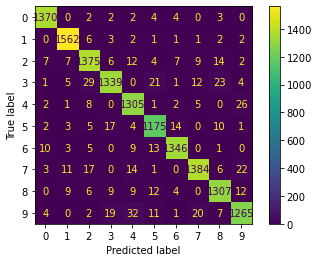

In [5]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rbf_svc, X_test, y_test)  

### SVC with GridSearch

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=10, n_jobs=-1)

%time grid.fit(X_train[:5000,], y_train[:5000,]) # using sampling to train

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 136 out of 144 | elapsed: 10.6min remaining:   37.6s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 11.0min finished


CPU times: user 8.46 s, sys: 118 ms, total: 8.58 s
Wall time: 11min 10s


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=10)

In [19]:
print(grid.best_estimator_)

SVC(C=0.1, gamma=1, kernel='poly')


In [20]:
y_pred = grid.predict(X_test)

In [21]:
# accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

# classification report (precision recall support)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

0.9456428571428571
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1387
           1       0.94      0.99      0.97      1580
           2       0.94      0.92      0.93      1443
           3       0.94      0.91      0.93      1435
           4       0.95      0.95      0.95      1350
           5       0.93      0.94      0.93      1231
           6       0.97      0.96      0.97      1387
           7       0.96      0.94      0.95      1458
           8       0.92      0.93      0.93      1368
           9       0.93      0.93      0.93      1361

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000

